In [1]:
import pandas as pd
import numpy as np
import datetime
import math

from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import cm

from Helpers import make_3Dfunction_plot
from Supply import WindSupply
from Supply import WindSupplyDummy
from Demand import Households
from Demand import HouseholdsDummy
from Storage import TrainTrack
from Controller import Controller

# Demand

               Start time            End time     E1A  E1B  E1C  E2A  E2B  \
0     2019-01-01 00:00:00 2019-01-01 00:15:00  498.54  0.0  0.0  0.0  0.0   
1     2019-01-01 00:15:00 2019-01-01 00:30:00  494.48  0.0  0.0  0.0  0.0   
2     2019-01-01 00:30:00 2019-01-01 00:45:00  490.56  0.0  0.0  0.0  0.0   
3     2019-01-01 00:45:00 2019-01-01 01:00:00  483.56  0.0  0.0  0.0  0.0   
4     2019-01-01 01:00:00 2019-01-01 01:15:00  471.38  0.0  0.0  0.0  0.0   
...                   ...                 ...     ...  ...  ...  ...  ...   
35035 2019-12-31 22:45:00 2019-12-31 23:00:00  517.58  0.0  0.0  0.0  0.0   
35036 2019-12-31 23:00:00 2019-12-31 23:15:00  502.04  0.0  0.0  0.0  0.0   
35037 2019-12-31 23:15:00 2019-12-31 23:30:00  497.00  0.0  0.0  0.0  0.0   
35038 2019-12-31 23:30:00 2019-12-31 23:45:00  494.34  0.0  0.0  0.0  0.0   
35039 2019-12-31 23:45:00 2020-01-01 00:00:00  500.92  0.0  0.0  0.0  0.0   

       E3A  E3B  E3C  E3D  E4A     Seconds        Days  
0      0.0  0.0  0

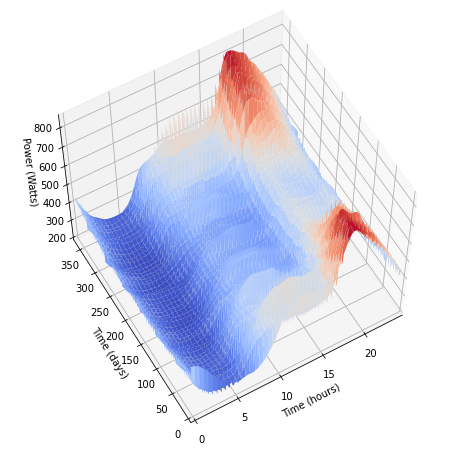

In [2]:
households = Households()
#print(households.data.head(100))
print(households.data)
#print(households.consumption(1400, 300))
make_3Dfunction_plot(households.consumption, zlabel = "Power (Watts)")

# Supply

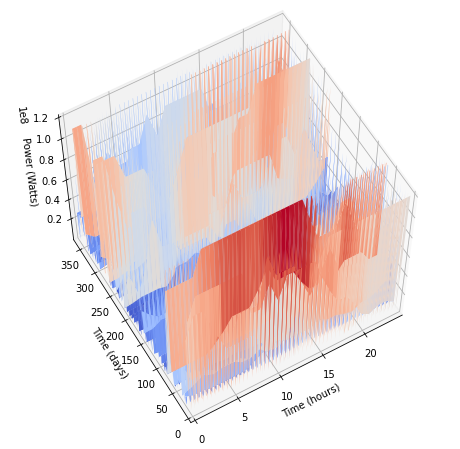

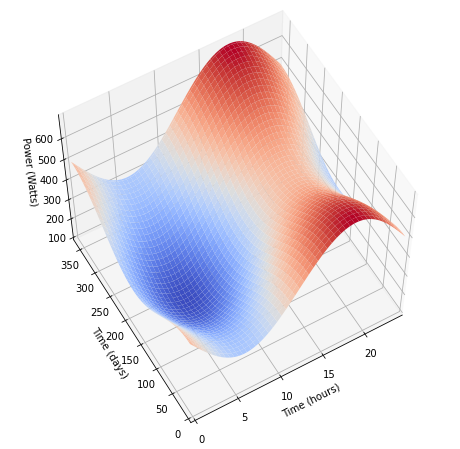

In [3]:
wind_supply = WindSupply()
make_3Dfunction_plot(wind_supply.output, zlabel = "Power (Watts)")

wind_supply = WindSupplyDummy()
make_3Dfunction_plot(wind_supply.output, zlabel = "Power (Watts)")

# Storage

In [4]:
train_track = TrainTrack()
time = 0
train_track.carts_on_track.append(train_track.track_length-1000)

for i in range(10):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Adding a generator force. \n")
train_track.force_of_generator = -(train_track.get_gravity() + train_track.get_friction())#142978

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Adding another cart. \n")
train_track.add_cart("Top")
#train_track.force_of_generator = -(train_track.get_gravity() + train_track.get_friction())

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Now trying to decelerate. \n")
train_track.force_of_generator = -1.4 * (train_track.get_gravity() + train_track.get_friction())#142978

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Running until at the bottom. \n")
train_track.force_of_generator = - (train_track.get_gravity() + train_track.get_friction())

print(time, train_track.return_data())
for i in range(2050):
    #print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1
print(time, train_track.return_data())

print("\n Removing a cart. \n")
train_track.remove_cart(1, 0)
train_track.force_of_generator = - (train_track.get_gravity() + train_track.get_friction())

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Adding another cart. \n")
train_track.add_cart("Top")
train_track.force_of_generator = -(train_track.get_gravity() + train_track.get_friction())

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1

print("\n Removing and adding a cart. \n")
train_track.remove_cart(1, 0)
train_track.add_cart("Top")

for i in range(20):
    print(time, train_track.return_data())
    train_track.do_tick(1)
    time = time + 1


0 {'Positions': array([19099.75]), 'Velocity': 0, 'Forces (gravity, friction, generator)': [-163134.0, 0.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([0, 0])}
1 {'Positions': array([19099.26]), 'Velocity': -0.98, 'Forces (gravity, friction, generator)': [-163134.0, 4902.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([0., 0.])}
2 {'Positions': array([19097.81]), 'Velocity': -1.92, 'Forces (gravity, friction, generator)': [-163134.0, 4925.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([4785.1,    0. ])}
3 {'Positions': array([19095.42]), 'Velocity': -2.87, 'Forces (gravity, friction, generator)': [-163134.0, 4964.0, 0], 'Power': 0.0, 'Other carts': {'Bottom': 150, 'Top': 150}, 'Losses (friction, efficiency)': array([9471.,    0.])}
4 {'Positions': array([19092.07]), 'Velocity': -3.82, 'Forces (gravity, friction, gener

# Controller

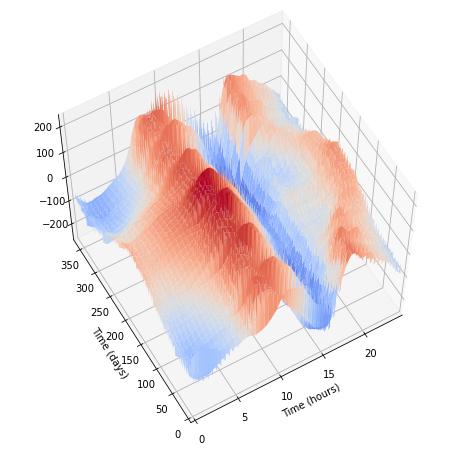

In [5]:
households = Households()
wind_supply = WindSupplyDummy()

def get_difference(time_seconds, time_days = 0, output = households, inputt  = wind_supply):
    return output.consumption(time_seconds, time_days) - inputt.output(time_seconds, time_days)

make_3Dfunction_plot(get_difference)

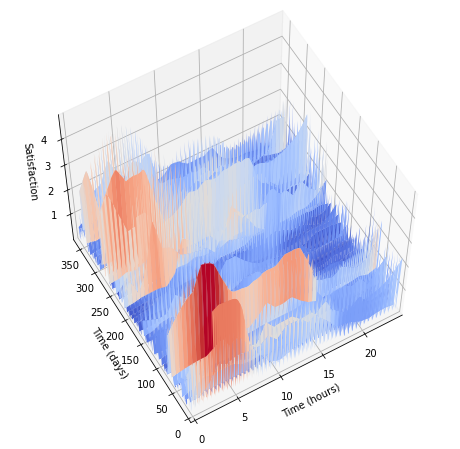

Time                      0.0
Velocity                  0.0
Satisfaction              0.0
Amount carts on track     0.0
Supply                    0.0
Demand                    0.0
Storage                   0.0
Difference                0.0
Losses                    0.0
Amount carts on top       0.0
Amount carts on bottom    0.0
dtype: float64


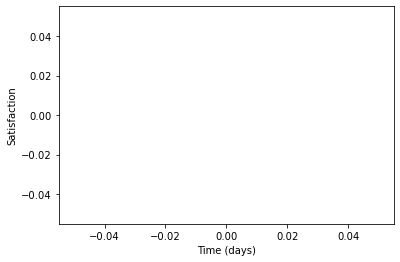

In [6]:
train_track = TrainTrack(carts = 0)
supply = WindSupply()
demand = Households(amount_of_households_per_type = [125000, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 120)

make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, zlabel = "Satisfaction")

data = pd.DataFrame(controller.data)
print(data.sum())

plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

In [7]:
controller = Controller()

controller.simulate(200)

data = pd.DataFrame(controller.data)

print(data)

    Time  Velocity  Satisfaction  Amount carts on track         Supply  \
0      0  0.000000      1.115483                      0  499429.223744   
1      5  0.316947      0.939779                      1  499356.584710   
2     10  0.171865      1.025997                      1  499283.945685   
3     15  0.234029      0.988439                      1  499211.306679   
4     20  0.207372      1.004875                      1  499138.667702   
5     25  0.218782      0.997891                      1  499066.028764   
6     30  0.213877      1.000896                      1  498993.389873   
7     35  0.215964      0.999610                      1  498920.751040   
8     40  0.215054      1.000162                      1  498848.112275   
9     45  0.215429      0.999925                      1  498775.473586   
10    50  0.215253      1.000027                      1  498702.834984   
11    55  0.215314      0.999983                      1  498630.196477   
12    60  0.215273      1.000002      

# Actual Simulation

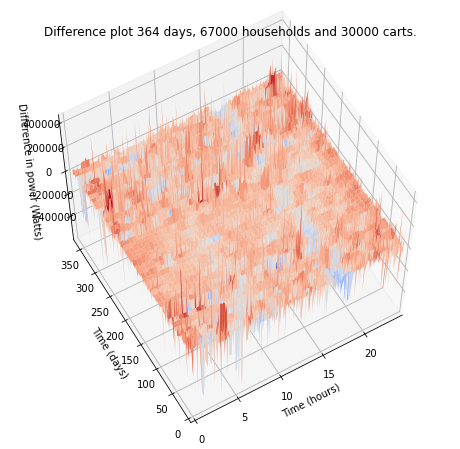

             Time  Velocity  Satisfaction  Amount carts on track  \
360          3600  0.804208      1.000177                     47   
361          3610  0.805033      1.001516                     47   
362          3620  0.811367      1.000783                     47   
363          3630  0.815340      1.001097                     47   
364          3640  0.799630      1.002599                     48   
...           ...       ...           ...                    ...   
3144956  31449560 -0.767921      1.000766                    193   
3144957  31449570 -0.763512      1.001101                    194   
3144958  31449580 -0.762686      1.000800                    194   
3144959  31449590 -0.762021      1.000770                    194   
3144960  31449600 -0.761371      1.000768                    194   

               Supply        Demand       Storage    Difference        Losses  \
360      4.040313e+07  3.158246e+07  8.815095e+06   5575.488258  2.645724e+07   
361      4.044485e+07

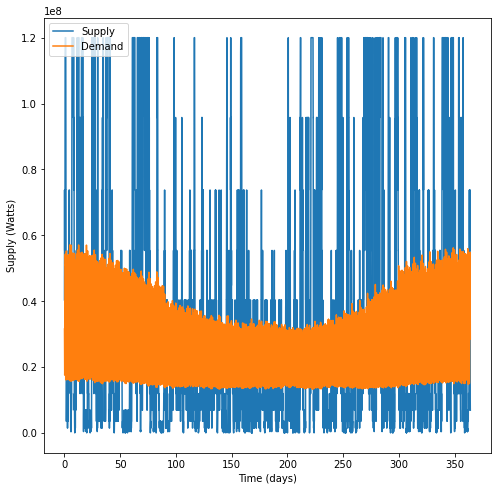

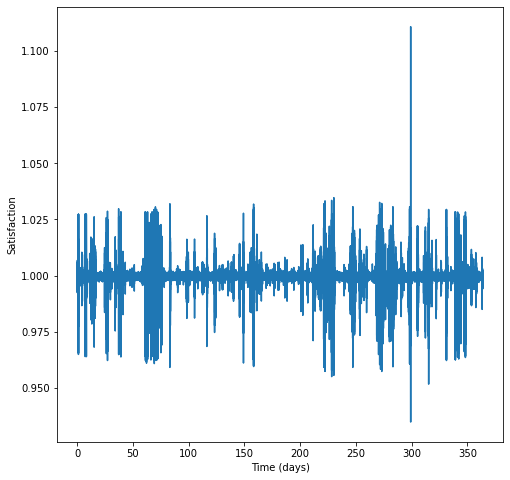

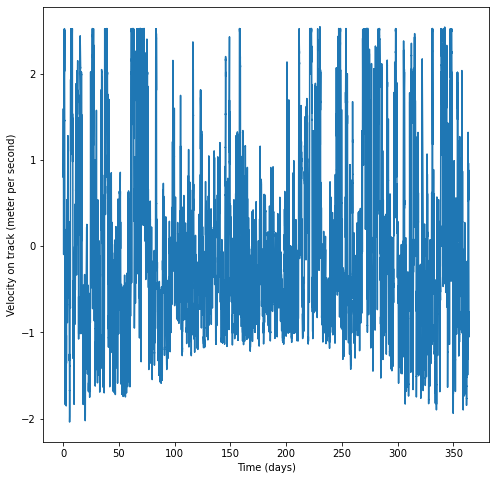

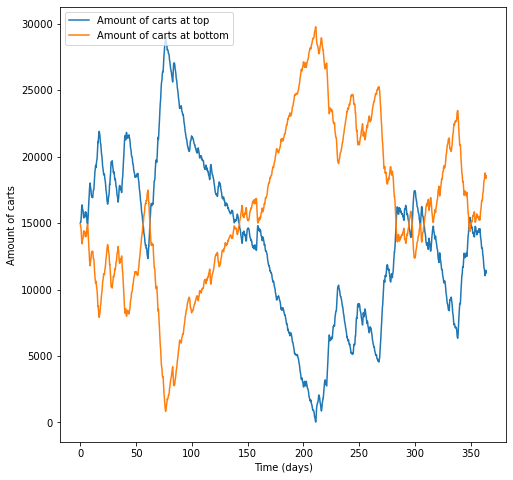

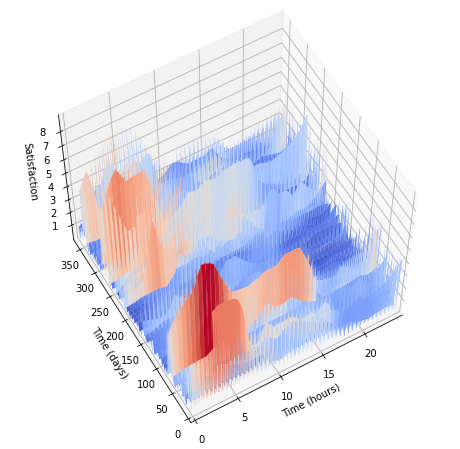

In [11]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 30000
amount_households = 66500
amount_windmils = 60
delta_time = 10

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = delta_time)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
#data = pd.read_csv("364days62500households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()


### Doing another simulation
train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.

make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, zlabel = "Satisfaction")

In [17]:
data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
#data = pd.read_csv("364days67000households10000000carts.csv")

data = pd.DataFrame(controller.data)
print(data)
print("Check if total energy stays the same (result should be around 1):", (np.sum(data["Demand"]) * delta_time + np.sum(data["Losses"])) / (np.sum(data["Supply"]) * delta_time))
print("Total efficiency :", 1 - (np.sum(data["Losses"])) / (np.sum(data["Supply"]) * delta_time))

     Time   Velocity  Satisfaction  Amount carts on track        Supply  \
0       0   0.000000      1.209596                      0  4.040313e+07   
1      10  10.000000      1.068445                      1  4.040313e+07   
2      20  10.000000      1.137576                      1  4.040313e+07   
3      30  17.071068      0.723663                      2  4.040313e+07   
4      40  13.938469      0.914282                      3  4.040313e+07   
..    ...        ...           ...                    ...           ...   
356  3560   0.800951      1.000154                     47  4.040313e+07   
357  3570   0.801702      1.000187                     47  4.040313e+07   
358  3580   0.802562      1.000173                     47  4.040313e+07   
359  3590   0.803375      1.000179                     47  4.040313e+07   
360  3600   0.804208      1.000177                     47  4.040313e+07   

           Demand       Storage    Difference        Losses  \
0    3.340218e+07  0.000000e+00  7.0

## Other simulations
Simulations for other graphs in the report.

### 125000 Households

         Unnamed: 0      Time  Velocity  Satisfaction  Amount carts on track  \
360             360      3600 -1.358119      1.000359                     93   
361             361      3610 -1.356879      1.001084                     93   
362             362      3620 -1.339149      1.001623                     94   
363             363      3630 -1.334211      1.001299                     94   
364             364      3640 -1.329829      1.001267                     94   
...             ...       ...       ...           ...                    ...   
3144956     3144956  31449560 -1.792032      0.999540                    177   
3144957     3144957  31449570 -1.791611      1.000704                    177   
3144958     3144958  31449580 -1.790376      1.000821                    177   
3144959     3144959  31449590 -1.789061      1.000833                    177   
3144960     3144960  31449600 -1.778194      1.001484                    178   

               Supply        Demand    

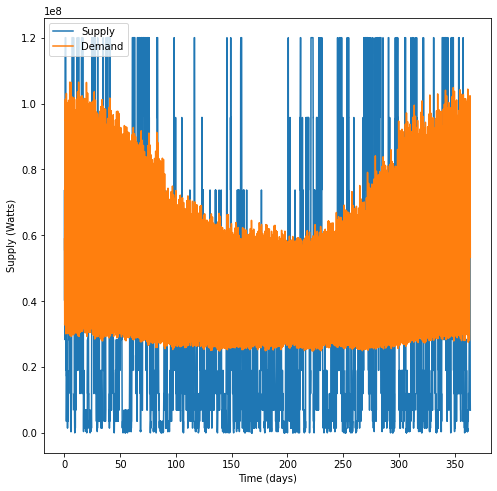

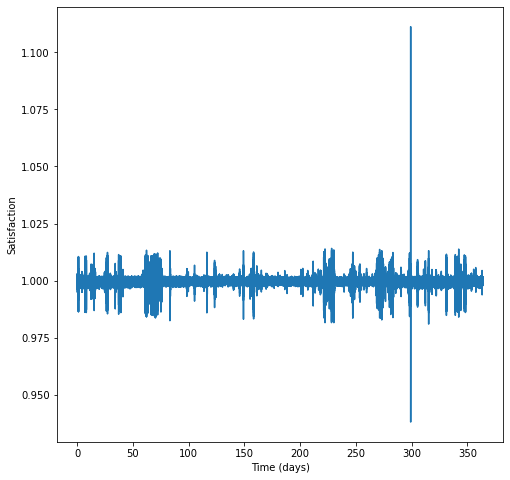

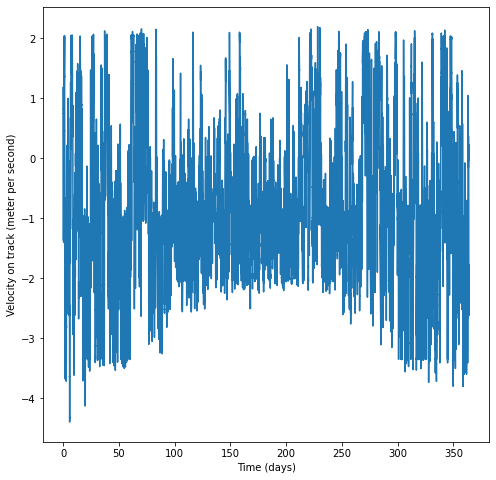

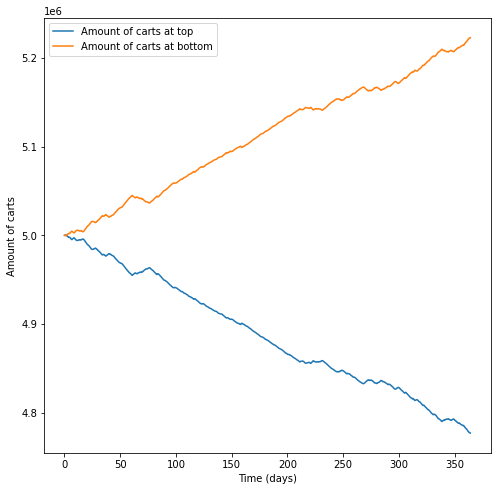

In [8]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 125000
amount_households = 67000
amount_windmils = 60

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
#make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

#data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
data = pd.read_csv("364days125000households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()

### 75000 households

         Unnamed: 0      Time  Velocity  Satisfaction  Amount carts on track  \
360             360      3600  0.655079      1.000182                     33   
361             361      3610  0.656397      1.001379                     33   
362             362      3620  0.665567      1.000749                     33   
363             363      3630  0.671371      1.001019                     33   
364             364      3640  0.678618      1.000902                     33   
...             ...       ...       ...           ...                    ...   
3144956     3144956  31449560 -0.912447      1.000768                    188   
3144957     3144957  31449570 -0.911704      1.000775                    188   
3144958     3144958  31449580 -0.910956      1.000776                    188   
3144959     3144959  31449590 -0.910208      1.000777                    188   
3144960     3144960  31449600 -0.904887      1.001159                    189   

               Supply        Demand    

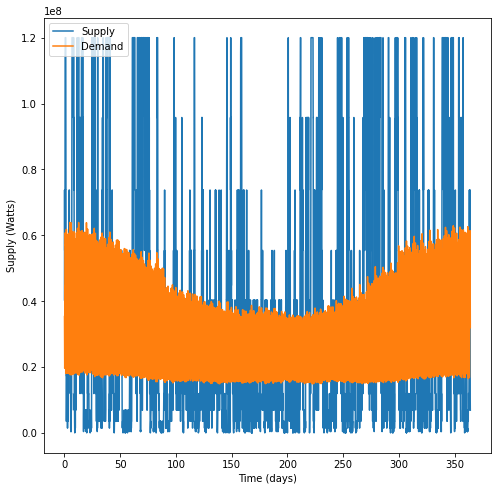

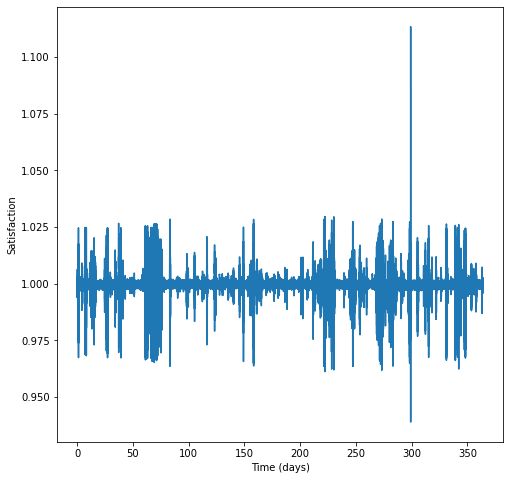

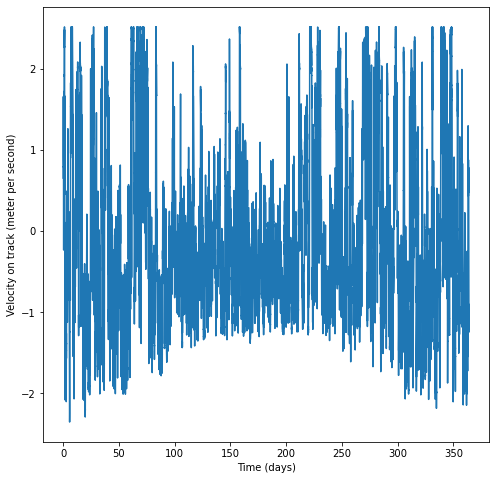

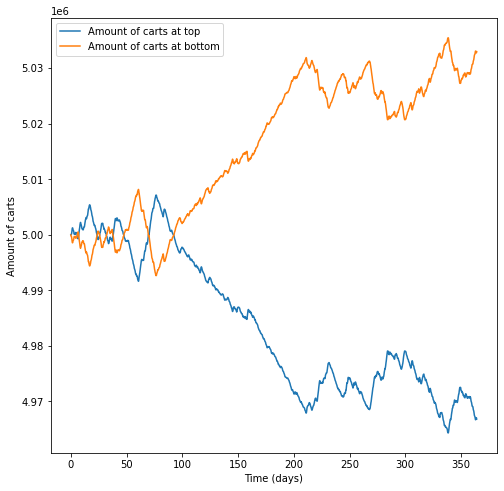

In [9]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 75000
amount_households = 67000
amount_windmils = 60

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
#make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

#data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
data = pd.read_csv("364days75000households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()

### 62500 households

         Unnamed: 0      Time  Velocity  Satisfaction  Amount carts on track  \
360             360      3600  0.884885      1.000177                     53   
361             361      3610  0.885575      1.001607                     53   
362             362      3620  0.891136      1.000808                     53   
363             363      3630  0.894609      1.001150                     53   
364             364      3640  0.878809      1.002970                     54   
...             ...       ...       ...           ...                    ...   
3144956     3144956  31449560 -0.696312      1.000761                    194   
3144957     3144957  31449570 -0.695708      1.000761                    194   
3144958     3144958  31449580 -0.695104      1.000762                    194   
3144959     3144959  31449590 -0.694500      1.000762                    194   
3144960     3144960  31449600 -0.693895      1.000763                    194   

               Supply        Demand    

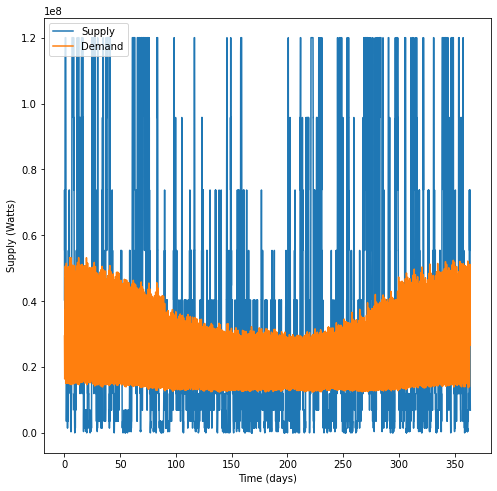

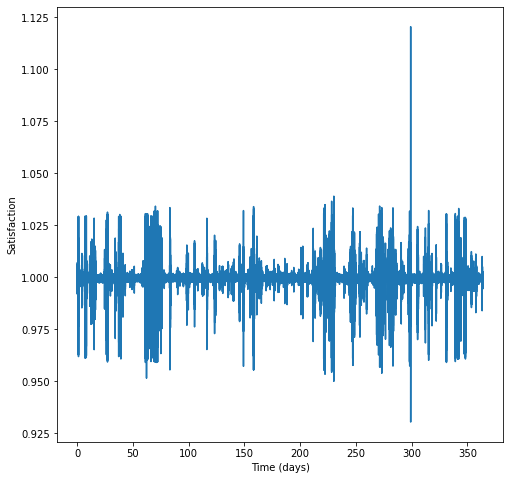

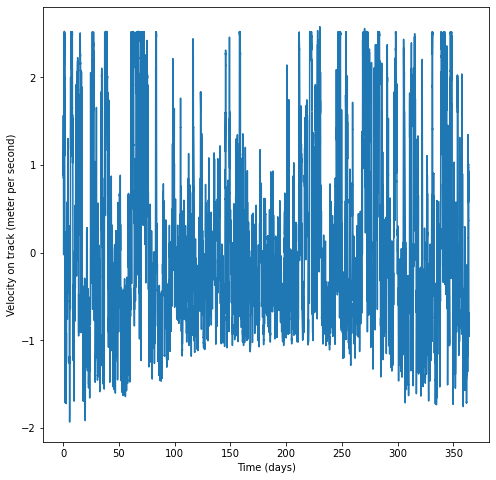

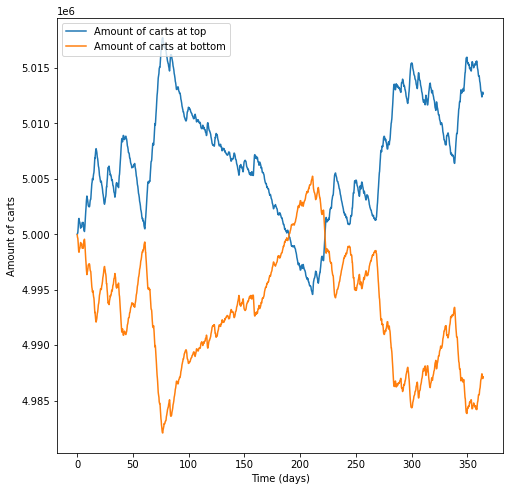

In [10]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 62500
amount_households = 67000
amount_windmils = 60

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
#make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

#data = pd.DataFrame(controller.data)
#data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
data = pd.read_csv("364days62500households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()

### 4 times simulation

In [ ]:
### SETTINGS
days_to_simulate = 364
amount_of_carts = 30000*4
amount_households = 66500*4
amount_windmils = 60*4

train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)


### SIMULATION AND PLOTTING
#make_3Dfunction_plot(controller.get_difference_supply_demand, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)")
#make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, amount_of_days = days_to_simulate, zlabel = "Satisfaction")
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.
make_3Dfunction_plot(controller.simulate, amount_of_days = days_to_simulate, zlabel = "Difference in power (Watts)", title = "Difference plot " +str(days_to_simulate) + " days, "+ str(amount_households) + " households and " + str(amount_of_carts) + " carts.")

data = pd.DataFrame(controller.data)
data.to_csv(str(days_to_simulate) + "days" + str(amount_households) + "households" + str(amount_of_carts) + "carts.csv")
#data = pd.read_csv("364days62500households10000000carts.csv")
data = data.iloc[360:]# Drop the first 360 rows (1 hour) of the data
print(data)

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Supply"], label="Supply")
plt.plot(data["Time"] / (3600 * 24), data["Demand"], label="Demand")
plt.xlabel("Time (days)")
plt.ylabel("Supply (Watts)")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Satisfaction"])
plt.xlabel("Time (days)")
plt.ylabel("Satisfaction")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Velocity"])
plt.xlabel("Time (days)")
plt.ylabel("Velocity on track (meter per second)")
plt.show()

plt.figure(figsize = (8,8))
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on top"], label = "Amount of carts at top")
plt.plot(data["Time"] / (3600 * 24), data["Amount carts on bottom"], label = "Amount of carts at bottom")
plt.xlabel("Time (days)")
plt.ylabel("Amount of carts")
plt.legend(loc="upper left")
plt.show()


### Doing another simulation
train_track = TrainTrack(carts = amount_of_carts/2)
supply = WindSupply(amount_of_windmills = amount_windmils)#WindSupplyDummy(100000)
demand = Households(amount_of_households_per_type = [amount_households, 0, 0, 0, 0, 0, 0, 0, 0, 0])# Theoretically 125000
controller = Controller(train_track = train_track, supply = supply, demand = demand, delta_time = 10)
controller.simulate(3600)# First simulate a hour to stabalize the stystem. This will cause the end result to have a constant first hour.

make_3Dfunction_plot(controller.get_sastisfaction_supply_demand, zlabel = "Satisfaction")